In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
from torch import nn
from torchvision import datasets, transforms

In [2]:
transform = transforms.Compose([transforms.Resize((28,28)),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, ), (0.5, ))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)
 
training_loader = torch.utils.data.DataLoader(training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size = 100, shuffle=False)

In [3]:
## Display the images 

In [4]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1, 2, 0)
  image = image * np.array((0.5, 0.5,0.5 )) + np.array((0.5,0.5,0.5 ))
  image = image.clip(0, 1)
  return image

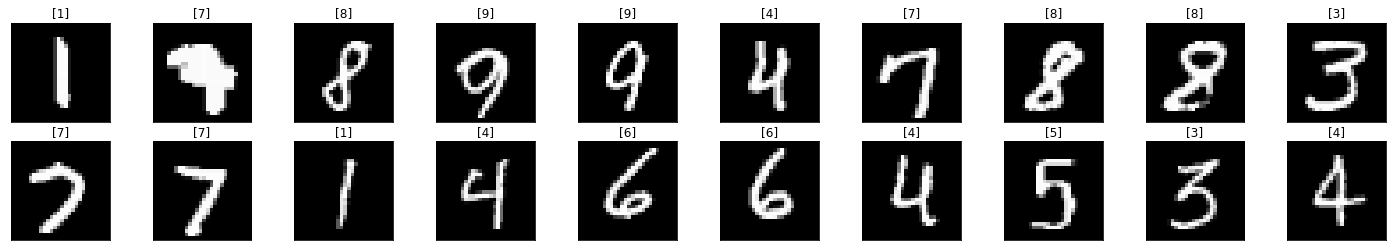

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25, 4))
 
for idx in np.arange(20):
  ax = fig.add_subplot(2, 10, idx+1, xticks=[], yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title([labels[idx].item()])

In [6]:
class Classifier(nn.Module):
    
    def __init__(self, D_in, H1, H2, D_out):
        super(Classifier,self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.linear2 = nn.Linear(H1, H2)
        self.dropout2 = nn.Dropout2d(0.25)
        self.linear3 = nn.Linear(H2, D_out)
    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = self.dropout1(x)
        x = F.relu(self.linear2(x))
        x = self.dropout2(x)
        x = self.linear3(x)
        return x

In [7]:
model = Classifier(784, 125, 65, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=125, bias=True)
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (linear2): Linear(in_features=125, out_features=65, bias=True)
  (dropout2): Dropout2d(p=0.25, inplace=False)
  (linear3): Linear(in_features=65, out_features=10, bias=True)
)

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [9]:
epochs = 15
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

In [10]:
for i in range(epochs):
    running_loss = 0.0
    running_corrects = 0.0
    for input,labels in training_loader:
        inputs = input.view(input.shape[0],-1)
        outputs = model(inputs)
        loss = criterion(outputs,labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        _,pred = torch.max(outputs,1)
        running_corrects += torch.sum(pred == labels.data)
    else:
        with torch.no_grad():
          validtion_loss = 0.0
          running_correct_vaid = 0.0
          for val_inputs,val_labels in  validation_loader:
            val_inputs = val_inputs.view(val_inputs.shape[0],-1)
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs,val_labels)
            _,pred = torch.max(outputs,1)
            running_correct_vaid  +=  torch.sum(pred == labels.data)
            validtion_loss +=  val_loss.item()   

        epoch_loss = running_loss / len(training_loader)
        running_corrects_data = running_corrects.float() / len(training_loader)
        running_loss_history.append(epoch_loss)
        running_corrects_history.append(running_corrects_data)
        print("training loss {:.4f}".format(epoch_loss))
        print("Correctvalue prediction {:.4f}".format(running_corrects_data))
        validation_loss_avg = validtion_loss  / len(validation_loader)
        running_correct_avg_val = running_correct_vaid  / len(validation_loader)
        val_running_loss_history.append(validation_loss_avg)
        val_running_corrects_history.append(running_correct_avg_val)
        print("Validation loss {:.4f}".format(validation_loss_avg))
        print("validation Correctvalue prediction {:.4f}".format(running_correct_avg_val))

training loss 1.1724
Correctvalue prediction 64.9200
Validation loss 0.6317
validation Correctvalue prediction 80.0000
training loss 0.5467
Correctvalue prediction 83.7267
Validation loss 0.4567
validation Correctvalue prediction 81.0000
training loss 0.4363
Correctvalue prediction 87.1167
Validation loss 0.3825
validation Correctvalue prediction 91.0000
training loss 0.3815
Correctvalue prediction 88.6450
Validation loss 0.3484
validation Correctvalue prediction 90.0000
training loss 0.3425
Correctvalue prediction 89.9567
Validation loss 0.3134
validation Correctvalue prediction 88.0000
training loss 0.3136
Correctvalue prediction 90.7083
Validation loss 0.2895
validation Correctvalue prediction 93.0000
training loss 0.2856
Correctvalue prediction 91.6383
Validation loss 0.2714
validation Correctvalue prediction 95.0000
training loss 0.2694
Correctvalue prediction 92.1700
Validation loss 0.2624
validation Correctvalue prediction 88.0000
training loss 0.2513
Correctvalue prediction 92.

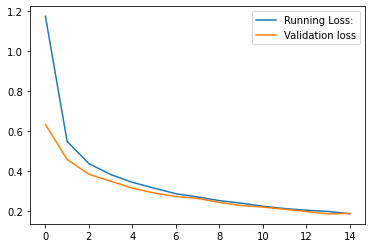

In [11]:
plt.plot(running_loss_history, label="Running Loss:")
plt.plot(val_running_loss_history,label="Validation loss")
plt.legend()
plt.show()

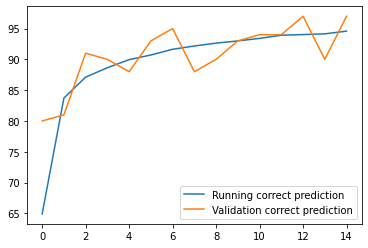

In [12]:
plt.plot(running_corrects_history, label="Running correct prediction")
plt.plot(val_running_corrects_history,label="Validation correct prediction")
plt.legend()
plt.show()

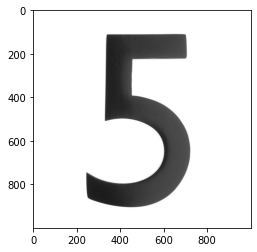

In [13]:
import requests
from PIL import Image 
url="https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg"
response = requests.get(url,stream=True)
img = Image.open(response.raw)
plt.imshow(img)


In [14]:
import PIL.ImageOps

In [15]:
img = PIL.ImageOps.invert(img)
img = img.convert('1')
img = transform(img)

In [16]:
img = img.view(img.shape[0],-1)
output = model(img)
_,pred = torch.max(output,1)
print(pred.item())

5


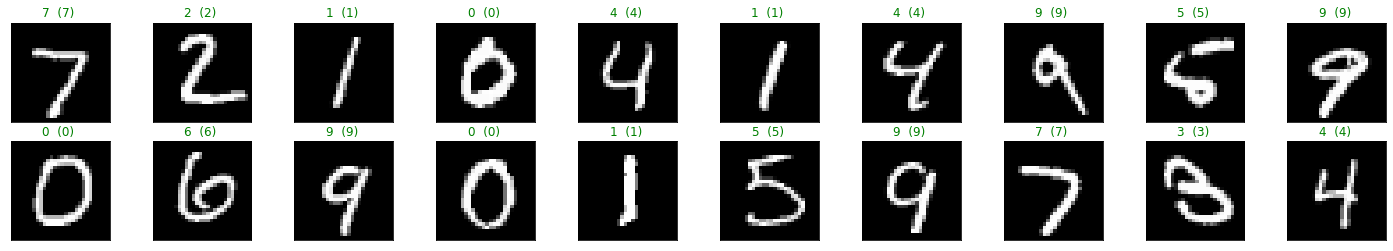

In [17]:
dataiter = iter(validation_loader)
images,labels = dataiter.next()
images_ = images.view(images.shape[0],-1)
output = model(images_)
_,preds = torch.max(output,1)
fig = plt.figure(figsize=(25,4))
for idx in range(20):
  ax = fig.add_subplot(2,10,idx+1,xticks=[],yticks=[])
  plt.imshow(im_convert(images[idx]))
  ax.set_title("{}  ({}) ".format(str(preds[idx].item()),str(labels[idx].item()) ) , color = ("green" if preds[idx] == labels[idx] else "red") )